## Sentiment Analysis

In [246]:
import nltk
import pickle
import networkx
import pandas as pd
import numpy as np
import string, re
import matplotlib.pyplot as plt
import vaderSentiment.vaderSentiment as vs
import seaborn as sns
import textblob as tb
# file = open("GOTNetwork.pkl",'rb')
# G = pickle.load(file)
# file.close()

Loading the csv file called scene_data which contains the collected data about spoken lines and metadata, created earlier in this document.

In [343]:
df = pd.read_csv("../data/scene_data.csv")
locdf = pd.read_csv("../data/scene_data_with_location.csv")
df["SceneLocations"] = locdf["scene_locations"]
df.drop(columns="Unnamed: 0")

,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,House,Affiliations,SceneLocations
0,waymar royce,1,1,winter is coming,Unknown,What d'you expect? They're savages. One lot st...,House Royce,Night's Watch,NaN
1,will,1,1,winter is coming,Unknown,I've never seen wildlings do a thing like this...,NaN,Night's Watch,NaN
2,waymar royce,1,1,winter is coming,Unknown,How close did you get?,House Royce,Night's Watch,NaN
3,will,1,1,winter is coming,Unknown,Close as any man would.,NaN,Night's Watch,NaN
4,gared,1,1,winter is coming,Unknown,We should head back to the wall.,NaN,Night's Watch,NaN
...,...,...,...,...,...,...,...,...,...
23629,sam,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,Uh... the Archmaester is less than enthusiasti...,NaN,NaN,council chamber
23630,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,"Well, I imagine he isn't using them properly.",Bronn's house,"Catelyn Stark, House Lannister, City Watch of ...",council chamber
23631,brienne of tarth,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think we can all agree that ships take prece...,House Tarth,"House Baratheon, Kingsguard, Renly Baratheon, ...",council chamber
23632,bronn,8,73,the iron throne,SMALL COUNCIL CHAMBER_4,I think that's a very presumptuous statement.,Bronn's house,"Catelyn Stark, House Lannister, City Watch of ...",council chamber


The wordTokenize function is a function that tokenizes and lemmatizes a string, and removes stopwords and other specified words. 

The plotFreqdist is a function that plots frequency distributions given a distribution. 

In [347]:
def wordTokenize(wordString: str):
    wnl = nltk.WordNetLemmatizer()
    stop_words = set(nltk.corpus.stopwords.words('english'))
    other_words = set(["n't"])
    stop_words = stop_words.union(other_words)
    tokens = nltk.tokenize.word_tokenize(wordString)

    filtered_tokens = [i.lower() for i in tokens if i.lower() not in list(string.punctuation) and re.match(f'\w+',i.lower()) and i.lower() not in stop_words]
    lemmatizedTokens = [wnl.lemmatize(t) for t in filtered_tokens]
    lemmatizedTokensUnfiltered = [wnl.lemmatize(t) for t in tokens]
    freqdist = nltk.FreqDist(lemmatizedTokens)
    return tokens, filtered_tokens, lemmatizedTokens, lemmatizedTokensUnfiltered, freqdist
    

def plotFreqdist(freqdist, title, nrofwordstoshow = 75):
    plt.figure(figsize=(15,6))
    freqdist.plot(nrofwordstoshow, title = title)

<>:8: SyntaxWarning: invalid escape sequence '\w'
<>:8: SyntaxWarning: invalid escape sequence '\w'
/tmp/ipykernel_677116/3083089411.py:8: SyntaxWarning: invalid escape sequence '\w'
  filtered_tokens = [i.lower() for i in tokens if i.lower() not in list(string.punctuation) and re.match(f'\w+',i.lower()) and i.lower() not in stop_words]


The function below takes a two columns from a dataframe and concatenates them, forming a dict where the key is eg. a character, and the values are the lines that character says.

In [263]:
def concatLinesby(df1, dflines):
    linesDict = dict()
    for group, lines in zip(df1,dflines):
        if lines != np.nan and group != np.nan and str(group) != "nan" and str(lines) != "nan":         
            if len(group.split(", ")) > 1:
                for d in group.split(", "):
                    #print(d)
                    
                    if d not in linesDict:
                        linesDict[d] = ""
                    try:
                        linesDict[d] += " " + lines
                    except TypeError:
                        print("Error:", d, lines)
            else:
                if group not in linesDict:
                    linesDict[group] = ""
                try:
                    linesDict[group] += " " + lines
                except TypeError:
                    print("Error:", group, lines)
        else:
            pass
    return linesDict



Below the house column of the dataframe is concatenated with the lines and a frequency distribution of the tokens are shown in the plot. 

This plot is not used in the report.

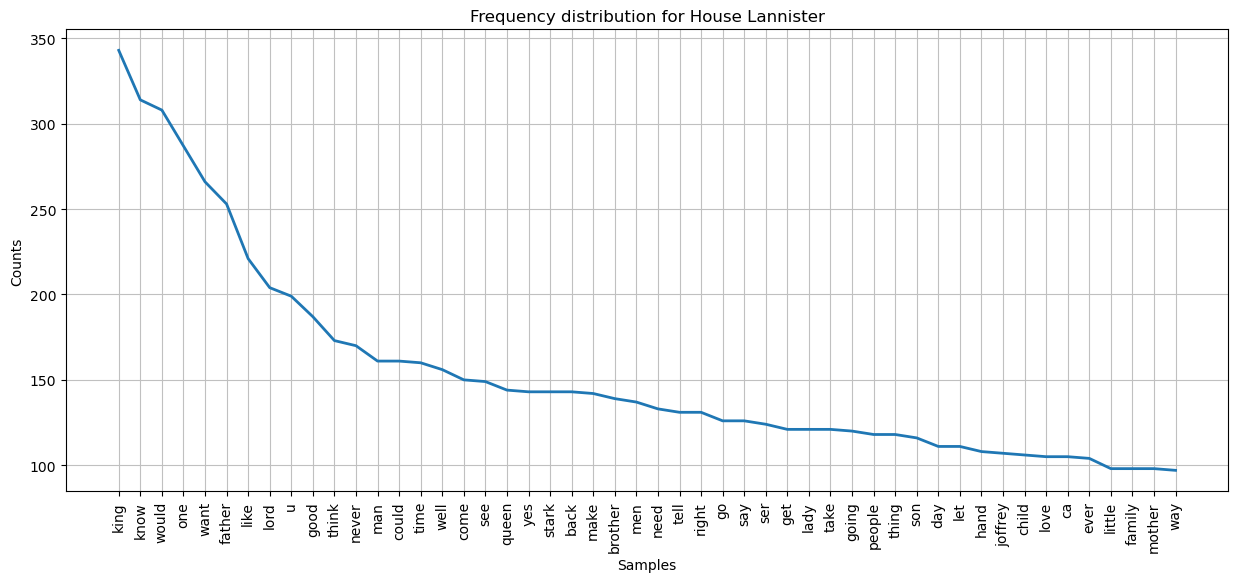

In [250]:
houseLinesDict = concatLinesby(df["House"],df["ScreenLine"])
freqdist = wordTokenize(houseLinesDict["House Lannister"])[4]


plotFreqdist(freqdist, "Frequency distribution for House Lannister", nrofwordstoshow= 50)

Here, the nltk package is used to write some lines that the House Lannister might say. They don't sound particularly realistic. 

This is not used in the report.

In [264]:
txt = nltk.Text(wordTokenize(houseLinesDict["House Lannister"])[1])
txt.generate()

Building ngram index...


placed high value brother life lannister might lowest lannisters one
us every day girl prayed somewhere else back ever stannis baratheon
sacks city takes iron throne confessed crimes gave irrefutable
evidence guilt would matter cersei wo rest head spike offering
knighthood whomever finds sansa stark eldest daughter lord eddard last
spoke offered counsel allow return courtesy bend knee grace nothing
strips bold notions man head like melon high sparrow head every
sparrow head every sparrow head like melon high sparrow looks
surprised faith crown two pillars hold world one collapses must
everything necessary protect one another send raven message
littlefinger


'placed high value brother life lannister might lowest lannisters one\nus every day girl prayed somewhere else back ever stannis baratheon\nsacks city takes iron throne confessed crimes gave irrefutable\nevidence guilt would matter cersei wo rest head spike offering\nknighthood whomever finds sansa stark eldest daughter lord eddard last\nspoke offered counsel allow return courtesy bend knee grace nothing\nstrips bold notions man head like melon high sparrow head every\nsparrow head every sparrow head like melon high sparrow looks\nsurprised faith crown two pillars hold world one collapses must\neverything necessary protect one another send raven message\nlittlefinger'

Below is a function for calculating sentiment using the vader sentiment package. These results were used preliminarily, but the function was later replaced with another function, using the LabMT wordlist for sentiment analysis, shown in the cell two cells below.

In [265]:
def updateDict(dictionaryindexed, sc):
    dictionaryindexed["neg_score"] += sc["neg"]
    dictionaryindexed["pos_score"] += sc["pos"]
    dictionaryindexed["neu_score"] += sc["neu"]
    dictionaryindexed["summed_compound"] += sc["compound"]
    
    dictionaryindexed["sentence_count"] += 1
    dictionaryindexed["neg_count"] += 1
    dictionaryindexed["pos_count"] += 1
    return dictionaryindexed

def sentimentAnalysisbyGroup(df1, dflines):
    sidobj = vs.SentimentIntensityAnalyzer()
    sentScoreDict = dict()
    for group, lines in zip(df1,dflines):
        if lines != np.nan and group != np.nan and str(group) != "nan" and str(lines) != "nan":         
            
            if len(str(group).split(", ")) > 1:
                for d in str(group).split(", "):
                    #print(d)
                    
                    if d not in sentScoreDict:
                        sentScoreDict[d] = {"summed_compound": 0, "neg_score": 0, "pos_score": 0, "neu_score": 0, "sentence_count": 0, "neg_count": 0, "pos_count" : 0}
                    try:
                        sc = sidobj.polarity_scores(lines)
                        sentScoreDict[d] = updateDict(sentScoreDict[d],sc)
                    except TypeError:
                        print("Error:", d, lines)
            else:
                if group not in sentScoreDict:
                    sentScoreDict[group] = {"summed_compound": 0, "neg_score": 0, "pos_score": 0, "neu_score": 0, "sentence_count": 0, "neg_count": 0, "pos_count" : 0}
                try:
                    sc = sidobj.polarity_scores(lines)
                    sentScoreDict[group] = updateDict(sentScoreDict[group],sc)
                except TypeError:
                    print("Error:", group, lines)
    for group in sentScoreDict:
        sentScoreDict[group]["avg_sentiment"] = sentScoreDict[group]["summed_compound"] / sentScoreDict[group]["sentence_count"]
    return sentScoreDict

The sentiment used in the report is calculated using the sentimentFunction defined below, which returns the overall sentiment for a list of tokens. 

In [266]:
# Loading the labmt wordlist and creating a wordlist dictionary
wordlist = pd.read_csv("../data/SentimentML.tsv", sep = "\t")
worddict = {word:float(hapavg) for word, hapavg in zip(wordlist.word, wordlist.happiness_average)}

def sentimentFunction(listoftokens):
    sentiment = 0
    fdist = nltk.FreqDist(tk.lower() for tk in listoftokens)
    freqsum = 0
    for token in sorted(fdist):
        if token in worddict:
            freq = float(fdist[token])
            freqsum += freq
            sentiment += freq * worddict[token]

    if freqsum == 0:
        return 0
    
    return sentiment

The sentimentAnalysis function takes two columns in the dataset along with the column containing the lines spoken, and returns a dictionary containing a sentiment score for all lines spoken. Eg it can be used to see the sentiment score of a characters lines (eg. df1), grouped by the 8 seasons. Or it could show the sentiment of a house through episodes, etc. 
The other function does the same thing, but only for a single column.

In [364]:
def sentimentAnalysisbyGroupMT(df1, df2, dflines):
    
    sentScoreDict = dict()
   
    for group, group2, lines in zip(df1,df2,dflines):
        try: 
            lemmatizedTokens = wordTokenize(lines)[2]
            if group not in sentScoreDict:
                sentScoreDict[group] = {}
            if group2 not in sentScoreDict[group]:
                sentScoreDict[group][group2] = {"summed_compound": 0, "token_count" : 0}
                
            sentScoreDict[group][group2]["summed_compound"] += sentimentFunction(lemmatizedTokens)
            sentScoreDict[group][group2]["token_count"] += len(lemmatizedTokens)
            
        except TypeError as error:
            #print(error)
            pass
        
    
    for group in sentScoreDict:
        for group2 in sentScoreDict[group]:
            try:
                sentScoreDict[group][group2]["avg_sentiment"] = sentScoreDict[group][group2]["summed_compound"] / sentScoreDict[group][group2]["token_count"]
            except ZeroDivisionError as error:
                pass
    

    return sentScoreDict
def sentimentAnalysisbyGroupMT2(df1, dflines):
    
    sentScoreDict = dict()
   
    for group, lines in zip(df1, dflines):
        try: 
            lemmatizedTokens = wordTokenize(lines)[2]
            if group not in sentScoreDict:
                sentScoreDict[group] = {"summed_compound": 0, "token_count" : 0}
            
                
            sentScoreDict[group]["summed_compound"] += sentimentFunction(lemmatizedTokens)
            sentScoreDict[group]["token_count"] += len(lemmatizedTokens)
            
        except TypeError as error:
            #print(error)
            pass
        
    
    for group in sentScoreDict:
        try:
            sentScoreDict[group]["avg_sentiment"] = sentScoreDict[group]["summed_compound"] / sentScoreDict[group]["token_count"]
        except ZeroDivisionError as error:
            pass
    

    return sentScoreDict

The sentiment of each persons lines for each season is calculated here. The three characters, Arya, Ramsay and Theon are selected for plotting, and thus a list containing the sentiment for each timepoint is created. A corresponding list with the names for the labels in the plot are created along with a range, in this case from season 1 to season 8. 

The plot is a lineplot created using seaborn.

/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future v

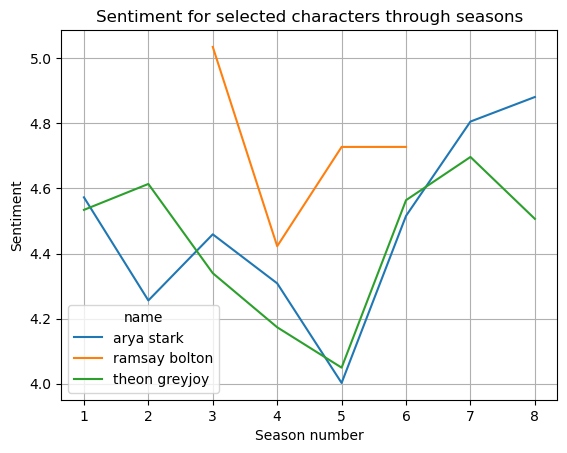

Mean sentiment: Ramsay Bolton 4.728321158323663
Mean sentiment: Arya Stark 4.475152979787024
Mean sentiment: Theon Greyjoy 4.434772842114548


In [365]:
sentimentManual = sentimentAnalysisbyGroupMT(df["Person"], df["SeasonNr"], df["ScreenLine"])
dataframe = pd.DataFrame()

namelist = ["arya stark",'ramsay bolton','theon greyjoy']

sentlist = [sentimentManual[name][x]["avg_sentiment"] if x in sentimentManual[name] else None for name in namelist for x in range(1,9)]
nameLabellist = [name for name in namelist for _ in range(1,9)]
rangelist = [r for _ in namelist for r in range(1,9)]

dataframe["sentiment"] = sentlist
dataframe["name"] = nameLabellist
dataframe["season"] = rangelist

plt.figure()
ax = sns.lineplot(data = dataframe, x = "season", y = "sentiment", hue = "name")
plt.xlabel("Season number")
plt.ylabel("Sentiment")
plt.title("Sentiment for selected characters through seasons")
plt.grid()
plt.show()

print("Mean sentiment: Ramsay Bolton",(dataframe[dataframe["name"] == "ramsay bolton"]["sentiment"]).mean())
print("Mean sentiment: Arya Stark",(dataframe[dataframe["name"] == "arya stark"]["sentiment"]).mean())
print("Mean sentiment: Theon Greyjoy",(dataframe[dataframe["name"] == "theon greyjoy"]["sentiment"]).mean())

In [366]:
sentimentManual = sentimentAnalysisbyGroupMT2(df["SceneLocations"], df["ScreenLine"])


19    5.041247
Name: sentiment, dtype: float64
20    3.953651
Name: sentiment, dtype: float64


/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/home/tbr/miniconda3/envs/SocialG/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future v

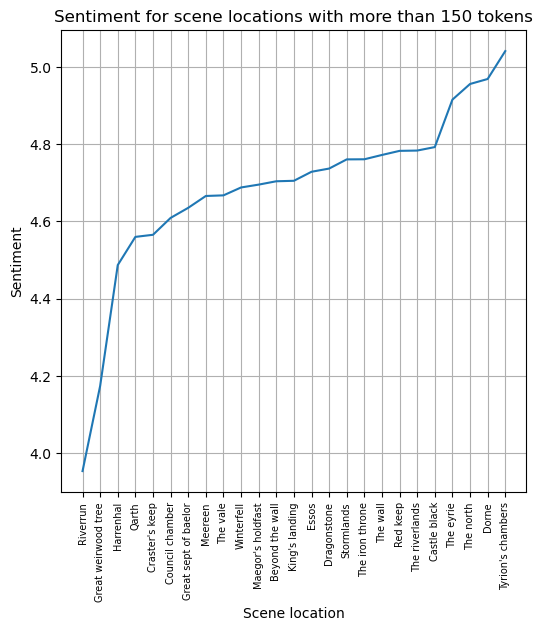

<Figure size 640x480 with 0 Axes>

In [369]:
dataframe = pd.DataFrame()
token_count = 150
sentlist = [sentimentManual[scene]["avg_sentiment"] for scene in sentimentManual if sentimentManual[scene]["token_count"] > token_count]
Labellist = [f'{scene[0].upper()}{scene[1:]}' if type(scene) is str else scene for scene in sentimentManual if sentimentManual[scene]["token_count"] > token_count]

dataframe["sentiment"] = sentlist
dataframe["scene"] = Labellist

dataframe = dataframe.sort_values(by='sentiment', ascending=True)
print(dataframe[dataframe["scene"] == "Tyrion's chambers"]["sentiment"])
print(dataframe[dataframe["scene"] == "Riverrun"]["sentiment"])

plt.figure(figsize=(6,6))
ax = sns.lineplot(data = dataframe, x = "scene", y = "sentiment")
plt.xlabel("Scene location")
plt.ylabel("Sentiment")
plt.xticks(rotation='vertical',size=7)
plt.title("Sentiment for scene locations with more than 150 tokens")
plt.grid()
plt.show()
plt.draw()

Here the imdbratings were added to the dataframe inorder to hopefully find some interesting patterns.

In [257]:
#Adding IMDb ratings to each spoken line in the dataframe
imdbratings = ["8.9	8.6	8.5	8.6	9 9.1	9.1	8.9	9.6	9.4 8.6	8.4	8.7	8.6	8.6	8.9	8.8	8.6	9.7	9.3 8.6	8.5	8.7	9.5	8.9	8.7	8.6	8.9	9.9	9.1 9	9.7	8.7	8.7	8.6	9.7	9	9.7	9.6	9.6 8.3	8.3	8.4	8.5	8.5	7.9	8.8	9.8	9.4	9.1 8.4	9.3	8.6	9 9.7 8.3 8.5 8.3 9.9 9.9 8.5 8.8 9.1	9.7	8.7	9 9.4 7.6	7.9	7.5	5.5	6	4"]
imdbratings = imdbratings[0].replace("\t"," ").split(" ")

imdbratingsEp = []
for i in df["EpisodeID"]:
    imdbratingsEp.append(float(imdbratings[int(i)-1]))
df["IMDBratings"] = imdbratingsEp

Here is another version of the sentiment analysis using a package called textblob, which did not yield very good results and was thus not used in the final report.

In [ ]:
def sentimentAnalysisbyGroupBlob(df1, dflines):
    
    sentScoreDict = dict()
    for group, lines in zip(df1,dflines):
        if lines != np.nan and group != np.nan and str(group) != "nan" and str(lines) != "nan":         
            
            if len(str(group).split(", ")) > 1:
                for d in str(group).split(", "):
                    #print(d)
                    
                    if d not in sentScoreDict:
                        sentScoreDict[d] = {"summed_compound": 0, "sentence_count": 0}
                    try:
                        sc = tb.TextBlob(lines).sentiment
                        
                        sentScoreDict[d]["summed_compound"] += sc.polarity
                        sentScoreDict[d]["sentence_count"] += 1
                    except TypeError:
                        print("Error:", d, lines)
            else:
                if group not in sentScoreDict:
                    sentScoreDict[group] = {"summed_compound": 0, "sentence_count": 0}
                try:
                    sc = tb.TextBlob(lines).sentiment

                    sentScoreDict[group]["summed_compound"] += sc.polarity
                    sentScoreDict[group]["sentence_count"] += 1
                except TypeError:
                    print("Error:", group, lines, sc)
    for group in sentScoreDict:
        sentScoreDict[group]["avg_sentiment"] = sentScoreDict[group]["summed_compound"] / sentScoreDict[group]["sentence_count"]
    return sentScoreDict

(0, None) (0.05554061123910805, 5)


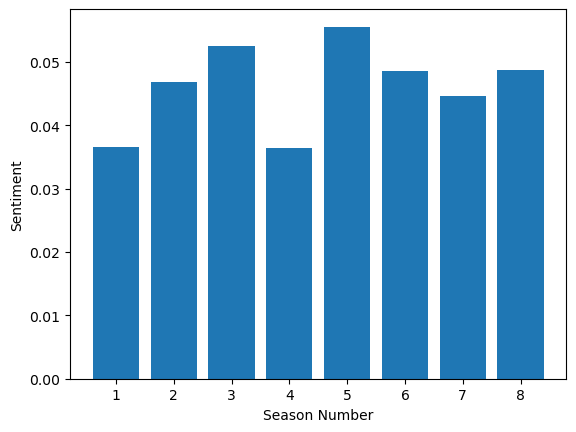

In [ ]:
Sentiment = sentimentAnalysisbyGroupBlob(df["SeasonNr"],df["ScreenLine"])

min_sent = 0, None
max_sent = 0, None
xlist = []
ylist = []
for name in Sentiment:
    if Sentiment[name]["avg_sentiment"] < min_sent[0]:# and Sentiment[name]["sentence_count"] > 20:
        min_sent = Sentiment[name]["avg_sentiment"], name
    if Sentiment[name]["avg_sentiment"] > max_sent[0]:# and Sentiment[name]["sentence_count"] > 20:
        max_sent = Sentiment[name]["avg_sentiment"], name
    if True:#Sentiment[name]["sentence_count"] > 20: 
        ylist.append((Sentiment[name]["avg_sentiment"]))
        xlist.append(name)
print(min_sent,max_sent)

plt.bar(xlist, ylist)
plt.ylabel("Sentiment")
plt.xlabel("Season Number")
plt.show()

In [358]:
df[df["SceneLocations"] == "fighting pit"]
    

,Unnamed: 0,Person,SeasonNr,EpisodeID,EpisodeTitle,Scene,ScreenLine,House,Affiliations,SceneLocations
16279,17078,daenerys targaryen,5,47,the gift,FIGHTING PIT_1,I think I’ve seen enough.,House Targaryen,NaN,fighting pit
16280,17079,hizdahr zo loraq,5,47,the gift,FIGHTING PIT_1,"Your Grace, it’s a tradition for the queen to ...",House of Loraq,"Great Masters, House Targaryen",fighting pit
16281,17080,daenerys targaryen,5,47,the gift,FIGHTING PIT_1,I’ve sacrificed more than enough for your trad...,House Targaryen,NaN,fighting pit
16282,17081,tyrion lannister,5,47,the gift,FIGHTING PIT - WAITING AREA_1,What are you doing?,House Lannister,"House Baratheon of King's Landing, Small Counc...",fighting pit
16283,17082,daenerys targaryen,5,47,the gift,FIGHTING PIT_4,Get him out of my sight.,House Targaryen,NaN,fighting pit
16284,17083,jorah mormont,5,47,the gift,FIGHTING PIT_4,"Khaleesi, please, I just need a moment of your...",House Mormont,"House Stark, Golden Company, Varys, House Targ...",fighting pit
16285,17084,tyrion lannister,5,47,the gift,FIGHTING PIT_4,It’s true. He has.,House Lannister,"House Baratheon of King's Landing, Small Counc...",fighting pit
16286,17085,daenerys targaryen,5,47,the gift,FIGHTING PIT_4,Who are you?,House Targaryen,NaN,fighting pit
16287,17086,tyrion lannister,5,47,the gift,FIGHTING PIT_4,"I am the gift. It’s a pleasure to meet you, Yo...",House Lannister,"House Baratheon of King's Landing, Small Counc...",fighting pit
16474,17276,jorah mormont,5,48,hardhome,FIGHTING PIT_5,You said whoever wins would fight at the Great...,House Mormont,"House Stark, Golden Company, Varys, House Targ...",fighting pit
